## First Derivative of a Function Using the Finite Difference Approximation

Finite-difference methods (FDM) are discretization techniques used for solving differential equations by approximating them with difference equations.

FDMs convert linear ordinary differential equations (ODE) or non-linear partial differential equations (PDE) into a solvable system of equations. 

In this notebook, I examine this technique, but for a simple cosine function.

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

\begin{equation}
f(x)= \cos (k x)
\end{equation}

where the wavenumber k is

\begin{equation}
k = \dfrac{2 \pi}{\lambda}
\end{equation}

and $\lambda$ is wavelength.

In [2]:
#Initialize Parameters

xmax = 10.0 #the size of the phsyical doamin
nx = 200 #number of grid points
dx = (xmax)/(nx-1) #grid increment
x = np.linspace(0, xmax, nx) #space coordinates


#Initialize the sin function
l = 40*dx #wavelength per grid points (lambda)
k = (2*pi)/l #wavenumber
f = np.cos(k*x) #fucntion

Text(0, 0.5, 'Amplitude')

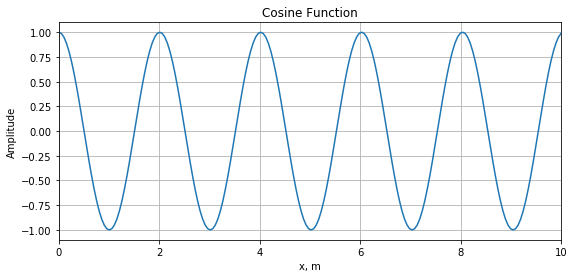

In [3]:
plt.figure(figsize = (9, 4))
plt.plot(x, f)
plt.grid()
plt.xlim((0, xmax))
plt.title('Cosine Function')
plt.xlabel('x, m')
plt.ylabel('Amplitude')

In the cell below I'll calculate (numerically) the derivative of f(x) using the central finite-difference method with two points. 

\begin{equation} 
f^{\prime}(x)=\dfrac{f(x+dx)-f(x-dx)}{2dx}
\end{equation} 

This method works by looking at the point to the left of our function value and to the right, then takes the difference, and divides by 2dx, and at the central point x, it will return an approximation of the first derivative.

We can compare with an analytical solution:

\begin{equation} 
f^{\prime}(x) = k -\sin(k x)
\end{equation} 

In [4]:
#illustrate with pyhton

nder = [None] * nx
ander = [None] * nx

for i in range(1,nx-1):
    nder[i] = (f[i+1] - f[i-1])/(2*dx)

ander = k*-(np.sin(k*x))

"""
I'll exclude the first and the last term of the analytical vector in order to avoid problems with the edges 
of the first and last points where we actually do not calculate the derivative. 
"""

ander[0] = 0
ander[nx-1] = 0

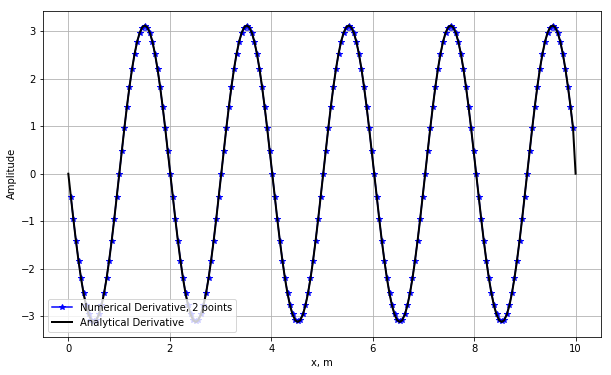

In [5]:
plt.figure(figsize=(10,6))
plt.plot (x, nder,label="Numerical Derivative, 2 points", marker='*', color="blue")
plt.plot (x, ander, label="Analytical Derivative", lw=2, ls="-",color="black")
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

So, basically, we have a plot of the numerical derivative superimposed on the analytical derivative. As one can see, we seem to be doing a pretty good job of calculating the numerical derivative in comparison with the analytical derivative. 